<font color='tomato'><font color="#CC3D3D"><p>
# Regression with Keras
https://www.tensorflow.org/tutorials/keras/regression?hl=ko    

### Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import random
import pickle
from IPython.display import Image
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.3.1


### Set random seeds to make your results reproducible

In [2]:
# 매번 모델링을 할 때마다 동일한 결과를 얻으려면 아래 코드를 실행해야 함.

def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(1)
    random.seed(2)
    tf.compat.v1.set_random_seed(3)
    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


### Step 1: Load and process the data

##### Read data

In [3]:
# 앞 단계(Feature Enginnering)에서 저장했던 훈련/평가/적용 데이터를 읽어온다.
X_train, X_test, y_train, y_test, X_dep, ID_dep = pd.read_pickle('comp_data.pkl')

# 모델링에 사용되는 최종 학습 및 평가 데이터 확인
X_train.shape, X_test.shape, X_dep.shape

((15110, 308), (6477, 308), (14380, 308))

##### Feature scaling

In [4]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

##### Split data into train & validation set 

In [5]:
# Train/Validation
i = int(round(X_train.shape[0] * 0.8,0))
X_valid, y_valid = X_train[i:], y_train[i:]
X_train, y_train = X_train[:i], y_train[:i]

### Step 2: Define the model architecture

##### Stack layers from input to output

|모듈|사용 예 및 종류|
|---|:---:|
|Initializer| Dense(16, kernel_initializer='he_normal')|
|Regularizer| Dense(16, kernel_regularizer=l2(0.01))|
|Activation|relu / elu / selu / softmax / tanh / sigmoid / linear|

In [6]:
# Input => Dense + Dense + ... => output
# Model(input, output)

input = keras.Input(shape=(X_train.shape[1],))

In [7]:
x = keras.layers.Dense(16, activation='relu')(input)
x = keras.layers.Dense(8, activation='relu')(x)
output = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(input, output)

*Keras Sequential API*
```
model = Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
  keras.layers.Dense(8),
  keras.layers.Dense(1, activation='sigmoid')
])
```

##### Summarize & visualize the model

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 308)]             0         
_________________________________________________________________
dense (Dense)                (None, 16)                4944      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 5,089
Trainable params: 5,089
Non-trainable params: 0
_________________________________________________________________


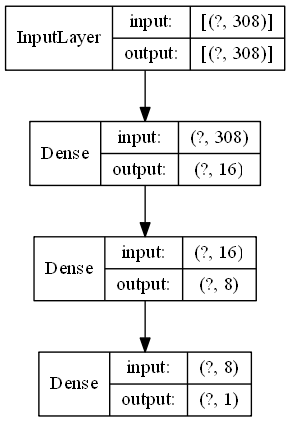

In [8]:
model.summary()
Image(keras.utils.model_to_dot(model,show_shapes=True,show_layer_names=False, dpi=100) \
      .create(prog='dot', format='png'))

### Step 3: Choose the optimizer and the cost function
<img align='left' src='http://drive.google.com/uc?export=view&id=1xybqHMvcDDfUYSN3FLQ6Y1708QkiZSJt' style="width: 70%">

*Optimizer의 예:*
- keras.optimizers.SGD(lr=0.01, momentum=0.9)
- keras.optimizers.RMSprop(lr=0.001, rho=0.9)
- keras.optimizers.Adagrad(lr=0.01)
- keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [9]:
# loss, optimizer, metrics 설정
model.compile(loss='mse', optimizer='adam', metrics=[keras.metrics.RootMeanSquaredError()])

### Step 4: Train the model

##### Set learning conditions & fit the model 

In [10]:
# batch size, epoch, 조기종료조건 등 설정
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),]
# keras.callbacks.ModelCheckpoint(filepath='best_nn_model.h5', monitor='val_loss', save_best_only=True)]

hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                 batch_size=128, epochs=300, callbacks=callbacks, shuffle=False, verbose=2)

Epoch 1/300
95/95 - 0s - loss: 1289.6979 - root_mean_squared_error: 35.9124 - val_loss: 1123.1528 - val_root_mean_squared_error: 33.5135
Epoch 2/300
95/95 - 0s - loss: 864.3095 - root_mean_squared_error: 29.3991 - val_loss: 546.3263 - val_root_mean_squared_error: 23.3736
Epoch 3/300
95/95 - 0s - loss: 440.7572 - root_mean_squared_error: 20.9942 - val_loss: 377.9972 - val_root_mean_squared_error: 19.4422
Epoch 4/300
95/95 - 0s - loss: 364.4568 - root_mean_squared_error: 19.0908 - val_loss: 325.3579 - val_root_mean_squared_error: 18.0377
Epoch 5/300
95/95 - 0s - loss: 309.7013 - root_mean_squared_error: 17.5983 - val_loss: 271.4903 - val_root_mean_squared_error: 16.4770
Epoch 6/300
95/95 - 0s - loss: 254.1217 - root_mean_squared_error: 15.9412 - val_loss: 218.7104 - val_root_mean_squared_error: 14.7889
Epoch 7/300
95/95 - 0s - loss: 201.5393 - root_mean_squared_error: 14.1965 - val_loss: 170.7876 - val_root_mean_squared_error: 13.0686
Epoch 8/300
95/95 - 0s - loss: 156.1684 - root_mean_s

##### Visualize training history 

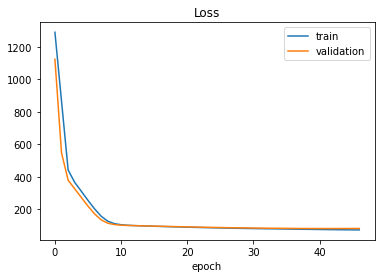

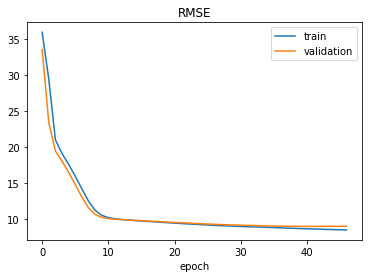

In [11]:
# Loss
plt.plot(hist.history["loss"], label="train")
plt.plot(hist.history["val_loss"], label="validation")
plt.legend()
plt.xlabel('epoch')
plt.title("Loss")
plt.show()

# ROC-AUC
plt.plot(hist.history["root_mean_squared_error"], label="train")
plt.plot(hist.history["val_root_mean_squared_error"], label="validation")
plt.legend()
plt.xlabel('epoch')
plt.title("RMSE")
plt.show()

### Step 5: Evaluate the model performance

In [12]:
# Loss & RMSE
model.evaluate(X_test, y_test)

203/203 [==============================] - 0s 839us/step - loss: 82.6277 - root_mean_squared_error: 9.0900


[82.62773132324219, 9.089980125427246]

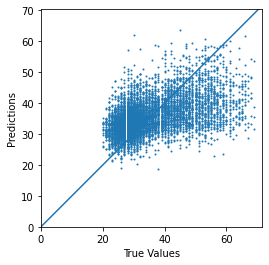

In [13]:
# Ground truth vs Prediction
test_predictions = model.predict(X_test).flatten()
plt.scatter(y_test, test_predictions, s=1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 100], [0, 100])

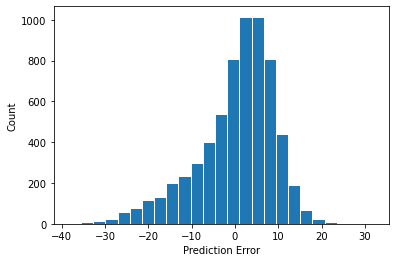

In [14]:
# Residual distribution
error = test_predictions - y_test
plt.hist(error, bins = 25, edgecolor='w')
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

### Step 6: Predict unseen data

In [15]:
# Generates output predictions for the input samples
model.predict(X_dep).flatten()

array([42.465122, 46.40238 , 27.874964, ..., 36.2273  , 38.212864,
       33.44091 ], dtype=float32)

In [16]:
# Make submissions: (결과) 9.10175
t = pd.Timestamp.now()
fname = f"dnn_submission_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
pd.DataFrame({'custid': ID_dep, 'age': model.predict(X_dep).flatten()}).to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

'dnn_submission_06021352.csv' is ready to submit.


###  Step 7: Save the model for future use

In [17]:
# pickle 형식으로 저장
# with open('nn_model.pkl', 'wb') as f:
#    pickle.dump(model, f)

# 추후 저장한 모형 불러올 때: 
# model = pd.read_pickle('nn_model.pkl')

In [18]:
# h5 형식으로 저장
# model.save('nn_model.h5')

# 추후 저장한 모형 불러올 때: 
# model = load_model('nn_model.h5')

<font color="#CC3D3D"><p>
# End